## Use of Cross-Validation in Machine Learning

Literature justifies the use of cross-validation techniques when having small data. Because splitting small data into training and testing leaves with the insufficient test set. For instance, in the case of the present loan dataset, there are 346 samples. When we do split into 80% training and 20% testing, we end up with 70 samples of the test set, which is small. In such a situation, the cross-validation method is highly recommended.

Consequently, the cross-validation technique is used for the current data. Accordingly, the sample was split into 10 folds. The performance of the accuracy score was very high on all of the algorithms in the experiment. The minimum mean score is 99.99% with a standard deviation of .01%. 

99.99% accuracy score does not necessarily mean the model will predict at such a rate all the time. What it does it mean is whatever prediction it does is reliable up to 99.99%.  For instance, after cross-validation, one of the present models, Decision Tree is able to predict at the rate of 74% on the testing dataset, which is reliable up to 99.99%.

In [1]:
import seaborn as sns
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
# Load Data From CSV File

URL = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv'
df = pd.read_csv(URL)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 10)

In [4]:
# Because of inconsistance in the column name capitalization, let us convet to the small case:

df.rename(columns={'Principal':'principal', 'Gender':'gender'}, inplace=True)
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'gender'],
      dtype='object')

Convert to date time object

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


### Data visualization and pre-processing

In [6]:
# Let’s see how many of each class is in data set:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

Let us see histograms on the payment status<br/>
Where,
    * ec = edge color
    * axes (-1) or (1) or (0) controls the legend to be displayed where
    * In this case, a maximum number we can use is 2, because clomun wrap size = 2

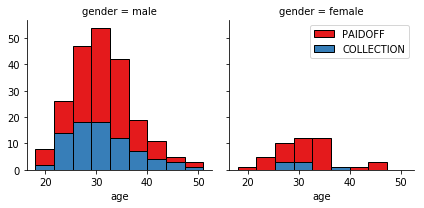

In [7]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Let us look at the day of the week people get the loan

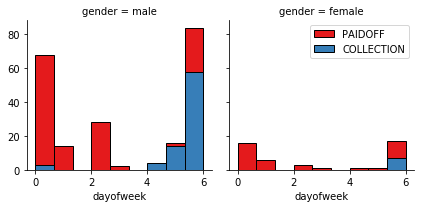

In [8]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [9]:
# We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4

df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,principal,terms,effective_date,due_date,age,education,gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


### Convert Categorical features to numerical values

In [10]:
# First let us group on gender and loan-status
df.groupby(['gender'])['loan_status'].value_counts(normalize=True)


gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [11]:
# gender conversion
# Lets convert male to 0 and female to 1:

df['gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,principal,terms,effective_date,due_date,age,education,gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [12]:
# Grouping on education and loan-status
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

### One Hot Encoding

Features Before One Hot Coding

In [13]:
df[['principal','terms','age','gender','education', 'loan_status']].head()

,principal,terms,age,gender,education,loan_status
0,1000,30,45,0,High School or Below,PAIDOFF
1,1000,30,33,1,Bechalor,PAIDOFF
2,1000,15,27,0,college,PAIDOFF
3,1000,30,28,1,college,PAIDOFF
4,1000,30,29,0,college,PAIDOFF


Let us use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [14]:
Feature = df[['principal','terms','age','gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['loan_status'])], axis=1)

Feature.drop(['Master or Above'], axis = 1,inplace=True)

Feature.drop(['High School or Below'], axis = 1,inplace=True)
Feature.drop(['COLLECTION'], axis = 1,inplace=True)
Feature.head()

,principal,terms,age,gender,weekend,Bechalor,college,PAIDOFF
0,1000,30,45,0,0,0,0,1
1,1000,30,33,1,0,1,0,1
2,1000,15,27,0,0,0,1,1
3,1000,30,28,1,1,0,1,1
4,1000,30,29,0,1,0,1,1


In [15]:
Feature.shape

(346, 8)

### Feature selection
Let us define feature sets, X, y: Here, I disregarded the 8th columns in y slice because the actual columns are 7. The 8th is one of dummies; the column, education, produced three dummies when converted: Bechalor,  High School or Below and college. High School or Below has been deleted, but the two remained in the columns. As a matter of good practice, I can delete is one dummy from single column.

In [16]:
from numpy import array
array = Feature.values
X = array[:, 0:8]
y = array[:, 7]

In [17]:
# Let us see y values after conversion of array:
y[0:5]


array([1, 1, 1, 1, 1])

### Normalize Data
Data Standardization give data zero mean and unit variance (technically should be done after train test split)

In [18]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062, -0.86968108,  0.5751254 ],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.86968108,  0.5751254 ],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062,  1.14984679,  0.5751254 ],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062,  1.14984679,  0.5751254 ],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062,  1.14984679,  0.5751254 ]])

### Training and Testing Classification Algorithms and Selecting One with Best Performance

In [19]:
#Test options and evaluation metric
test_size = 0.2
seed = 1
scoring = 'accuracy'

In [21]:
from sklearn import model_selection

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [24]:
# import necessary librarie
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [26]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))  

In [27]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 1.000000 (0.000000)
LDA: 1.000000 (0.000000)
KNN: 0.996296 (0.011111)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)


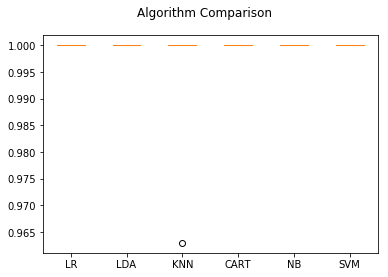

In [28]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Model Evaluation using Test set (load file, loan_test)

In [33]:
URL = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'
test_df = pd.read_csv(URL)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [34]:
test_df.rename(columns={'Principal': 'principal', 'Gender': 'gender'}, inplace = True)
test_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'gender'],
      dtype='object')

### Pre-processing loan_test

In [35]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature_test = test_df[['principal','terms','age','gender','weekend']]

Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['loan_status'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)

Feature_test.drop(['High School or Below'], axis = 1,inplace=True)
Feature_test.drop(['COLLECTION'], axis = 1,inplace=True)

In [39]:
Feature_test.head()

,principal,terms,age,gender,weekend,Bechalor,college,PAIDOFF
0,1000,30,50,1,0,1,0,1
1,300,7,35,0,0,0,0,1
2,1000,30,43,1,0,0,0,1
3,1000,30,26,0,1,0,1,1
4,800,15,29,0,1,1,0,1


In [41]:
Feature_test.shape

(54, 8)

In [42]:
from numpy import array
array = Feature_test.values
X_t = array[:, 0:8]
y_t = array[:, 7]

As shown above, on the cross-validation results, most of the algorithms have demonstrated 100% accuracy score, with a minimum score of 99.99%. Due to the nature of data, let us evaluate a prediction on KNN or Decision Tree. Let take for now the Decision Tree. 

In [43]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
y_t_pred = Dtree.predict(X_t)
y_t_pred[0:5]

array([1, 1, 1, 1, 1])

In [47]:
print(accuracy_score(y_t, y_t_pred))
print(confusion_matrix(y_t, y_t_pred))
print(classification_report(y_t, y_t_pred))

0.7407407407407407
[[ 0 14]
 [ 0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

   micro avg       0.74      0.74      0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
# let us use random forest, for possible difference on performance

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10)

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
y_rfc_pred = rfc.predict(X_t)
y_rfc_pred[0:5]

array([1, 1, 1, 1, 1])

In [50]:
print(accuracy_score(y_t, y_rfc_pred))
print(confusion_matrix(y_t, y_rfc_pred))
print(classification_report(y_t, y_rfc_pred))

0.7407407407407407
[[ 0 14]
 [ 0 40]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

   micro avg       0.74      0.74      0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Interestingly, the precision score and f-score are 74% and 85%, respectively, for both Decision Tree and Random Forest. That means the model is able to predict correctly at the rate of 74% percent on new data (not part of training), which is somewhat moderate. 